In [2]:
import numpy as np
from PIL import Image
import pandas as pd

import matplotlib.pyplot as plt
from collections import Counter

import os
import csv

## Data Exploration 
- Vizualize test images and explore the distribution of font class and nspw
- Explore balance font datasets for training
- Create datasets with path to image and font class label for data manipulation

{'font': 'Sentinel-Bold', 'nsfw': 'True'}


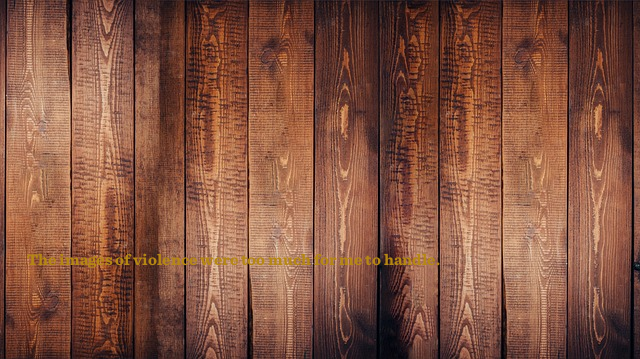

In [3]:
#Explore images

img = Image.open('dataset_image_train/img_30.png')

print(img.info)
img

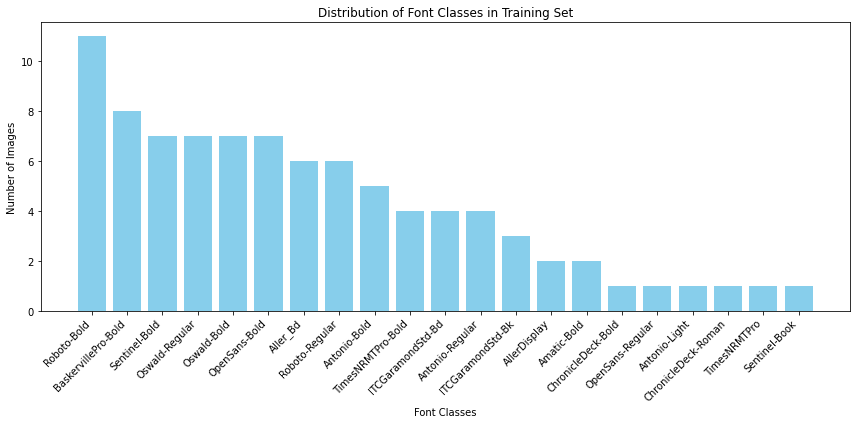

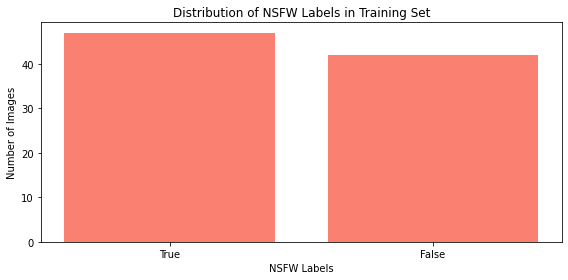

In [4]:
# Define the path to the training dataset
data_path = "dataset_image_train"  # Replace with the actual path

# Initialize counters for fonts and NSFW labels
font_counter = Counter()
nsfw_counter = Counter()

# Iterate through all images in the dataset
for image_name in os.listdir(data_path):
    if image_name.endswith('.png'):
        image_path = os.path.join(data_path, image_name)
        
        # Open the image and extract metadata
        img = Image.open(image_path)
        metadata = img.info
        
        # Extract font information from metadata
        font = metadata.get('font', 'Unknown').replace('.ttf', '')
        font_counter[font] += 1

        # Extract NSFW information from metadata
        nsfw = metadata.get('nsfw', 'Unknown')
        nsfw_counter[nsfw] += 1

# Convert the font counter to a sorted list for visualization
font_classes, font_counts = zip(*font_counter.most_common())

# Plot the number of each font class
plt.figure(figsize=(12, 6))
plt.bar(font_classes, font_counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Font Classes")
plt.ylabel("Number of Images")
plt.title("Distribution of Font Classes in Training Set")
plt.tight_layout()
plt.show()

# Convert the NSFW counter to a sorted list for visualization
nsfw_classes, nsfw_counts = zip(*nsfw_counter.most_common())

# Plot the number of NSFW labels
plt.figure(figsize=(8, 4))
plt.bar(nsfw_classes, nsfw_counts, color='salmon')
plt.xlabel("NSFW Labels")
plt.ylabel("Number of Images")
plt.title("Distribution of NSFW Labels in Training Set")
plt.tight_layout()
plt.show()


In [5]:
len(font_classes)

21

In [6]:
# Paths to datasets
base_paths = {
    "dataset_char_color": "/Users/Ccmac/Downloads/Technical_test_font/dataset_char_color",
    "dataset_char_gray": "/Users/Ccmac/Downloads/Technical_test_font/dataset_char_gray",
    "dataset_word_color": "/Users/Ccmac/Downloads/Technical_test_font/dataset_word_color",
    "dataset_word_gray": "dataset_word_gray",
    "dataset_image_train": "dataset_image_train", 
    "dataset_word_gray_sub": "dataset_word_gray_sub",
    "dataset_image_test": "dataset_image_test"
}

# Function to create CSV for character datasets
def process_char_dataset(dataset_path, output_csv):
    with open(output_csv, mode="w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["image_path", "font", "character"])
        
        for font in os.listdir(dataset_path):
            font_path = os.path.join(dataset_path, font)
            if os.path.isdir(font_path):
                for char in os.listdir(font_path):
                    char_path = os.path.join(font_path, char)
                    if os.path.isdir(char_path):
                        for img in os.listdir(char_path):
                            if img.endswith('.png'):
                                writer.writerow([os.path.join(char_path, img), font, char])

# Function to create CSV for word datasets
def process_word_dataset(dataset_path, output_csv):
    with open(output_csv, mode="w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["image_path", "font"])
        
        for font in os.listdir(dataset_path):
            font_path = os.path.join(dataset_path, font)
            if os.path.isdir(font_path):
                for img in os.listdir(font_path):
                    if img.endswith('.png'):
                        writer.writerow([os.path.join(font_path, img), font])

# Function to create CSV for image training dataset
def process_image_train_dataset(dataset_path, output_csv):
    with open(output_csv, mode="w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["image_path", "font", "nsfw"])
        
        for img in os.listdir(dataset_path):
            if img.endswith('.png'):
                img_path = os.path.join(dataset_path, img)
                image = Image.open(img_path)
                metadata = image.info
                font = metadata.get('font', 'Unknown').replace('.ttf', '')
                nsfw = metadata.get('nsfw', 'Unknown')
                writer.writerow([img_path, font, nsfw])

# Process each dataset
process_char_dataset(base_paths["dataset_char_color"], "dataset_char_color.csv")
process_char_dataset(base_paths["dataset_char_gray"], "dataset_char_gray.csv")
process_word_dataset(base_paths["dataset_word_color"], "dataset_word_color.csv")
process_word_dataset(base_paths["dataset_word_gray"], "dataset_word_gray.csv")
process_word_dataset(base_paths["dataset_word_gray_sub"], "dataset_word_gray_sub.csv")
process_image_train_dataset(base_paths["dataset_image_train"], "dataset_image_train.csv")
#process_image_test_dataset(base_paths["dataset_image_test"], "dataset_image_test.csv")

print("CSV files created successfully!")

CSV files created successfully!


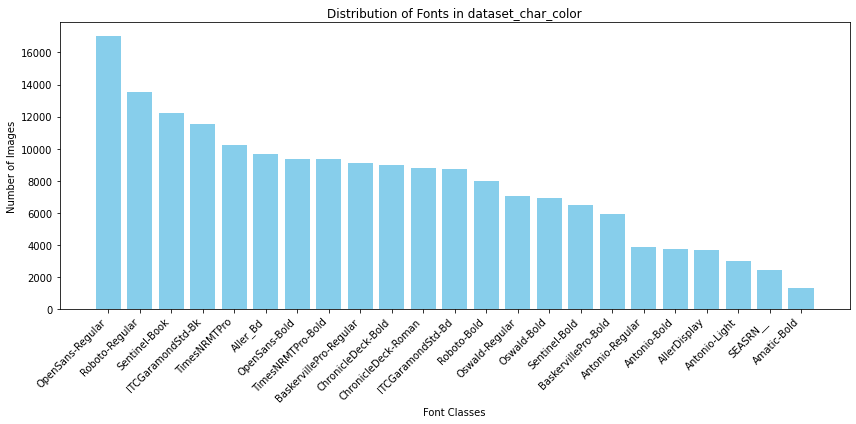

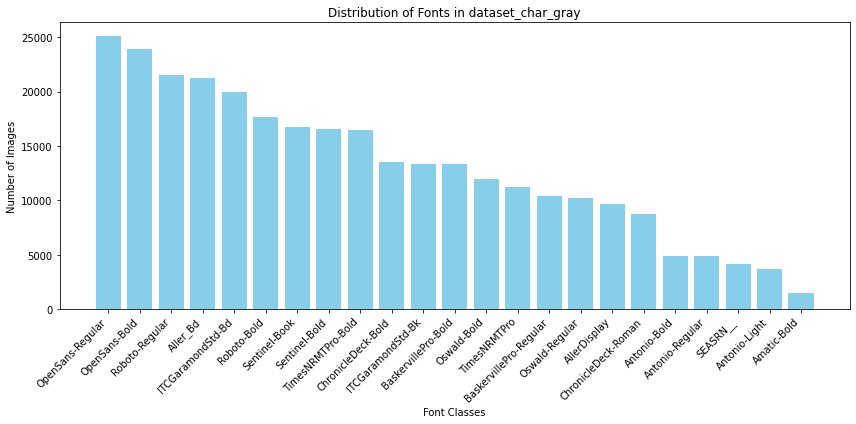

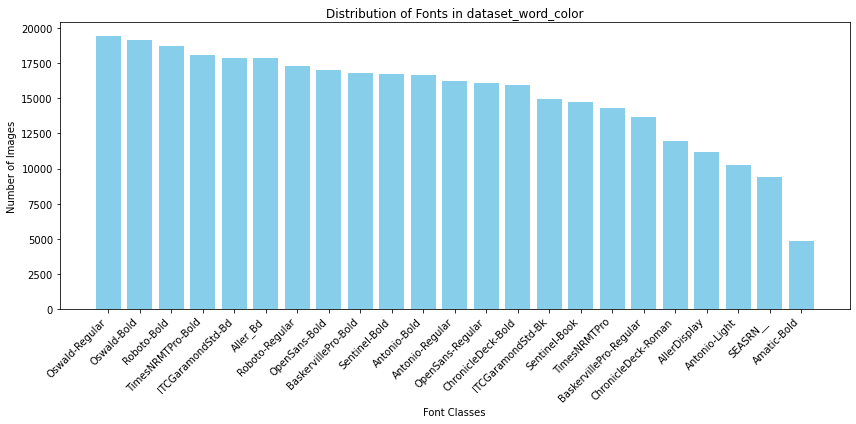

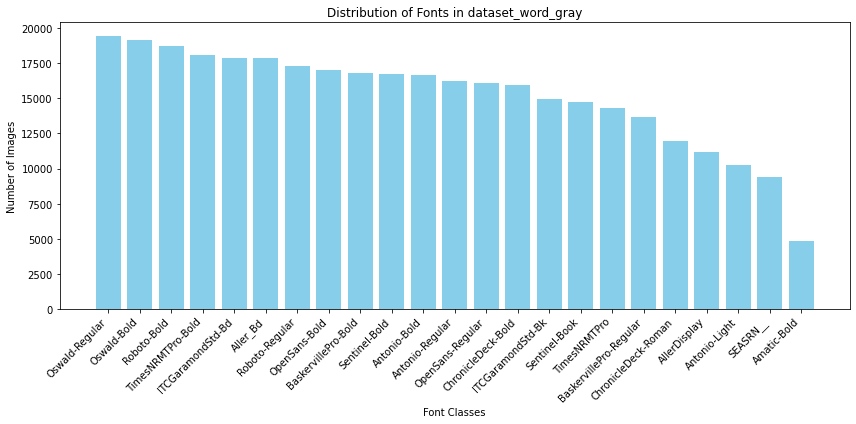

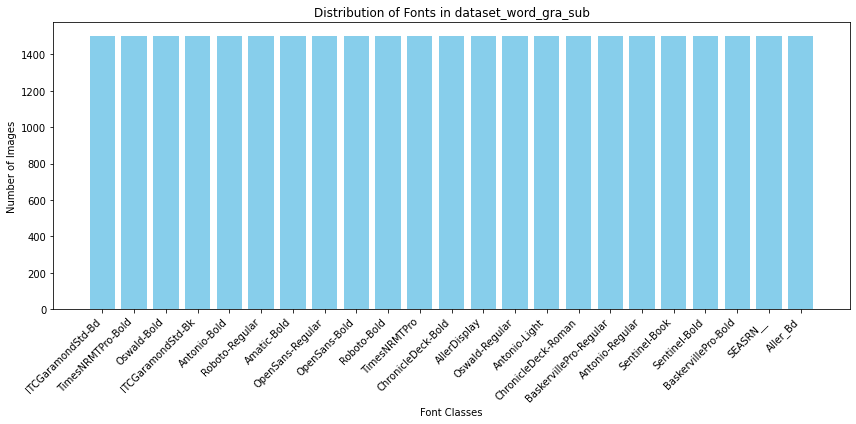

In [7]:
# Define the paths to the CSV files
csv_paths = {
    "dataset_char_color": "dataset_char_color.csv",
    "dataset_char_gray": "dataset_char_gray.csv",
    "dataset_word_color": "dataset_word_color.csv",
    "dataset_word_gray": "dataset_word_gray.csv",
    "dataset_word_gray_sub": "dataset_word_gray_sub.csv",
    "dataset_image_train": "dataset_image_train.csv",
    "dataset_image_test": "dataset_image_test.csv"
}

# Function to plot the number of images per font from a CSV file
def plot_font_distribution(csv_path, title):
    # Read the CSV file
    data = pd.read_csv(csv_path)
    
    # Count the occurrences of each font
    font_counter = Counter(data["font"])
    font_classes, font_counts = zip(*font_counter.most_common())

    # Plot the distribution
    plt.figure(figsize=(12, 6))
    plt.bar(font_classes, font_counts, color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Font Classes")
    plt.ylabel("Number of Images")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plot the distributions for each dataset
plot_font_distribution(csv_paths["dataset_char_color"], "Distribution of Fonts in dataset_char_color")
plot_font_distribution(csv_paths["dataset_char_gray"], "Distribution of Fonts in dataset_char_gray")
plot_font_distribution(csv_paths["dataset_word_color"], "Distribution of Fonts in dataset_word_color")
plot_font_distribution(csv_paths["dataset_word_gray"], "Distribution of Fonts in dataset_word_gray")
plot_font_distribution(csv_paths["dataset_word_gray_sub"], "Distribution of Fonts in dataset_word_gra_sub")


In [ ]:
### Plot test set distribution - later

# Define the path to the training dataset
data_path = "dataset_image_test"  # Replace with the actual path

# Initialize counters for fonts and NSFW labels
font_counter = Counter()
nsfw_counter = Counter()

# Iterate through all images in the dataset
for image_name in os.listdir(data_path):
    if image_name.endswith('.png'):
        image_path = os.path.join(data_path, image_name)
        
        # Open the image and extract metadata
        img = Image.open(image_path)
        metadata = img.info
        
        # Extract font information from metadata
        font = metadata.get('font', 'Unknown').replace('.ttf', '')
        font_counter[font] += 1

        # Extract NSFW information from metadata
        nsfw = metadata.get('nsfw', 'Unknown')
        nsfw_counter[nsfw] += 1

# Convert the font counter to a sorted list for visualization
font_classes, font_counts = zip(*font_counter.most_common())

# Plot the number of each font class
plt.figure(figsize=(12, 6))
plt.bar(font_classes, font_counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Font Classes")
plt.ylabel("Number of Images")
plt.title("Distribution of Font Classes in Training Set")
plt.tight_layout()
plt.show()

# Convert the NSFW counter to a sorted list for visualization
nsfw_classes, nsfw_counts = zip(*nsfw_counter.most_common())

# Plot the number of NSFW labels
plt.figure(figsize=(8, 4))
plt.bar(nsfw_classes, nsfw_counts, color='salmon')
plt.xlabel("NSFW Labels")
plt.ylabel("Number of Images")
plt.title("Distribution of NSFW Labels in Training Set")
plt.tight_layout()
plt.show()
